In [212]:
#import sys
#sys.setdefaultencoding("utf-8")
import xmltodict
import requests 

def loadSDOAbstracts(): 
    # url of rss feed 
    url = 'http://adsabs.harvard.edu/cgi-bin/nph-abs_connect?db_key=AST&db_key=PRE&qform=AST&arxiv_sel=astro-ph&arxiv_sel=cond-mat&arxiv_sel=cs&arxiv_sel=gr-qc&arxiv_sel=hep-ex&arxiv_sel=hep-lat&arxiv_sel=hep-ph&arxiv_sel=hep-th&arxiv_sel=math&arxiv_sel=math-ph&arxiv_sel=nlin&arxiv_sel=nucl-ex&arxiv_sel=nucl-th&arxiv_sel=physics&arxiv_sel=quant-ph&arxiv_sel=q-bio&sim_query=YES&ned_query=YES&adsobj_query=YES&aut_logic=OR&obj_logic=OR&author=&object=&start_mon=&start_year=&end_mon=&end_year=&ttl_logic=OR&title=&txt_logic=OR&text=&nr_to_return=4000&start_nr=1&jou_pick=NO&ref_stems=&data_and=ALL&group_and=NO&group_sel=SDO&start_entry_day=&start_entry_mon=&start_entry_year=2005&end_entry_day=&end_entry_mon=&end_entry_year=&min_score=&sort=NDATE&data_type=XML&aut_syn=YES&ttl_syn=YES&txt_syn=YES&aut_wt=1.0&obj_wt=1.0&ttl_wt=0.3&txt_wt=3.0&aut_wgt=YES&obj_wgt=YES&ttl_wgt=YES&txt_wgt=YES&ttl_sco=YES&txt_sco=YES&version=1'
    # creating HTTP response object from given url 
    resp = requests.get(url) 
    # saving the xml file 
    with open('sdo_refereed_papers.xml', 'wb') as f: 
        f.write(resp.content)         

loadSDOAbstracts()
with open('./sdo_refereed_papers.xml',encoding='utf-8') as fd:
    doc = xmltodict.parse(fd.read())
import numpy as np

In [316]:
def search_aia(input_abstract,keywords):
    abstract = input_abstract.replace('\n', ' ').lower()
    #print(abstract)
    for key in keywords:
        if abstract.find(key) != -1: return True
    return False

def search_abstracts(records,keywords):
    n = len(records)
    result = np.zeros(shape=(n),dtype=bool)
    for i in range(0,n):
        if records[i]['pubdate'].find('201') != -1:
            result[i] = search_aia(records[i]['abstract'],keywords)
        
    print('{} refereed SDO papers with at least one of the following keywords:{}'.format(int(result.sum()),str(keywords)))
    return result

In [317]:
keywords = ['aia','sdo/aia','atmospheric imaging assembly']
search_abstracts(doc['records']['record'],keywords)

keywords = ['euv','extreme ultraviolet','extreme ultra violet','aia','sdo/aia','atmospheric imaging assembly']
search_abstracts(doc['records']['record'],keywords)

keywords = ['euv','extreme ultraviolet','extreme ultra violet','aia','sdo/aia','atmospheric imaging assembly',
            '1600', '1700','94','131','171','193','211','304','335']
search_abstracts(doc['records']['record'],keywords)

keywords = ['euv','extreme ultraviolet','extreme ultra violet','aia','sdo/aia','atmospheric imaging assembly',
            '1600', '1700','94','131','171','193','211','304','335','spicule','flare','cme','coronal hole']
search_abstracts(doc['records']['record'],keywords)

keywords = ['euv','extreme ultraviolet','extreme ultra violet','aia','sdo/aia','atmospheric imaging assembly',
            'spicule','jet', 'prominence', 'filament','filament eruption','flare','corona', 'cme','iris','coronal hole',
            '1600', '1700','94','131','171','193','211','304','335']
search_abstracts(doc['records']['record'],keywords)




770 refereed SDO papers with at least one of the following keywords:['aia', 'sdo/aia', 'atmospheric imaging assembly']
1129 refereed SDO papers with at least one of the following keywords:['euv', 'extreme ultraviolet', 'extreme ultra violet', 'aia', 'sdo/aia', 'atmospheric imaging assembly']
1210 refereed SDO papers with at least one of the following keywords:['euv', 'extreme ultraviolet', 'extreme ultra violet', 'aia', 'sdo/aia', 'atmospheric imaging assembly', '1600', '1700', '94', '131', '171', '193', '211', '304', '335']
1834 refereed SDO papers with at least one of the following keywords:['euv', 'extreme ultraviolet', 'extreme ultra violet', 'aia', 'sdo/aia', 'atmospheric imaging assembly', '1600', '1700', '94', '131', '171', '193', '211', '304', '335', 'spicule', 'flare', 'cme', 'coronal hole']
2199 refereed SDO papers with at least one of the following keywords:['euv', 'extreme ultraviolet', 'extreme ultra violet', 'aia', 'sdo/aia', 'atmospheric imaging assembly', 'spicule', 'je

array([ True,  True,  True, ..., False, False, False])

In [400]:
keywords = ['new solar telescope','goode']
select=search_abstracts(doc['records']['record'],keywords)
keywords = ['euv','extreme ultraviolet','extreme ultra violet','aia','sdo/aia','atmospheric imaging assembly',
            'spicule','jet', 'prominence', 'filament','filament eruption','flare','corona', 'cme','iris','coronal hole',
            '1600', '1700','94','131','171','193','211','304','335']
select=(search_abstracts(doc['records']['record'],keywords))*select
keywords = ['iris']
select=(search_abstracts(doc['records']['record'],keywords))*select
nst = np.array(doc['records']['record'])[select]

44 refereed SDO papers with at least one of the following keywords:['new solar telescope', 'goode']
2199 refereed SDO papers with at least one of the following keywords:['euv', 'extreme ultraviolet', 'extreme ultra violet', 'aia', 'sdo/aia', 'atmospheric imaging assembly', 'spicule', 'jet', 'prominence', 'filament', 'filament eruption', 'flare', 'corona', 'cme', 'iris', 'coronal hole', '1600', '1700', '94', '131', '171', '193', '211', '304', '335']
96 refereed SDO papers with at least one of the following keywords:['iris']


In [401]:
import pandas as pd
titles = []
authors= []
citations=[]
pubdates =[]
journals = []
abstracts = []
urls = []
for paper in nst:
    titles.append(paper['title'])
    authors.append(paper['author'][0]+' et al.')
    pubdates.append(paper['pubdate'])
    abstracts.append(paper['abstract'])
    if 'citations' in paper.keys():
        citations.append(int(paper['citations']))
    else:
        citations.append(0)
    if 'journal' in paper.keys():
        journals.append(paper['journal'])
    else:
        journals.append('')
    if 'url' in paper.keys():
        urls.append(paper['url'])
    else: 
        urls.append('')
results= {'titles':titles, 'authors':authors, 'citations':citations, 'pubdates':pubdates,
         'journals':journals, 'abstracts':abstracts, 'urls':urls}
gstsdo = pd.DataFrame(results)
gstsdo = gstsdo.sort_values('citations',ascending=False)
gstsdo
for i in range(len(gstsdo.values[:,0])):
    print(gstsdo['titles'][i]+', '+gstsdo['authors'][i]+' '+(gstsdo['pubdates'][i]).split(' ')[1])
gstsdo

Multi-wavelength Study of Transition Region Penumbral Subarcsecond Bright Dots Using IRIS and NST, Deng, Na et al. 2016
Multi-wavelength Observations of a Subarcsecond Penumbral Transient Brightening Event, Bai, X. Y. et al. 2016
Oscillatory Response of the Solar Chromosphere to a Strong Downflow Event above a Sunspot, Kwak, Hannah et al. 2016
Multiwavelength Observations of a Slow-rise, Multistep X1.6 Flare and the Associated Eruption, Yurchyshyn, V. et al. 2015
Simultaneous observation of a hot explosion by NST and IRIS, Kim, Yeon-Han et al. 2015
Properties of Chromospheric Evaporation and Plasma Dynamics of a Solar Flare from Iris, Sadykov, Viacheslav M. et al. 2015
Dynamics in Sunspot Umbra as Seen in New Solar Telescope and Interface Region Imaging Spectrograph Data, Yurchyshyn, V. et al. 2015
Multi-wavelength High-resolution Observations of a Small-scale Emerging Magnetic Flux Event and the Chromospheric and Coronal Response, Vargas Domínguez, Santiago et al. 2014


,titles,authors,citations,pubdates,journals,abstracts,urls
4,Simultaneous observation of a hot explosion by...,"Kim, Yeon-Han et al.",24,Sep 2015,"The Astrophysical Journal, Volume 810, Issue 1...",We present the first simultaneous observations...,http://adsabs.harvard.edu/abs/2015ApJ...810...38K
5,Properties of Chromospheric Evaporation and Pl...,"Sadykov, Viacheslav M. et al.",22,Jun 2015,"The Astrophysical Journal, Volume 805, Issue 2...",The dynamics of hot chromospheric plasma of so...,http://adsabs.harvard.edu/abs/2015ApJ...805..167S
6,Dynamics in Sunspot Umbra as Seen in New Solar...,"Yurchyshyn, V. et al.",17,Jan 2015,"The Astrophysical Journal, Volume 798, Issue 2...",We analyze sunspot oscillations using Interfac...,http://adsabs.harvard.edu/abs/2015ApJ...798..136Y
0,Multi-wavelength Study of Transition Region Pe...,"Deng, Na et al.",11,Oct 2016,"The Astrophysical Journal, Volume 829, Issue 2...",Using high-resolution transition region (TR) o...,http://adsabs.harvard.edu/abs/2016ApJ...829..103D
2,Oscillatory Response of the Solar Chromosphere...,"Kwak, Hannah et al.",10,Apr 2016,"The Astrophysical Journal Letters, Volume 821,...",We report three-minute oscillations in the sol...,http://adsabs.harvard.edu/abs/2016ApJ...821L..30K
7,Multi-wavelength High-resolution Observations ...,"Vargas Domínguez, Santiago et al.",10,Oct 2014,"The Astrophysical Journal, Volume 794, Issue 2...",State-of-the-art solar instrumentation is now ...,http://adsabs.harvard.edu/abs/2014ApJ...794..140V
1,Multi-wavelength Observations of a Subarcsecon...,"Bai, X. Y. et al.",7,May 2016,"The Astrophysical Journal, Volume 823, Issue 1...",We report a subarcsecond penumbral transient b...,http://adsabs.harvard.edu/abs/2016ApJ...823...60B
3,"Multiwavelength Observations of a Slow-rise, M...","Yurchyshyn, V. et al.",4,Oct 2015,"The Astrophysical Journal, Volume 812, Issue 2...","Using multiwavelength observations, we studied...",http://adsabs.harvard.edu/abs/2015ApJ...812..172Y


In [376]:
citations=[]
for paper in nst:
    if 'citations' in paper.keys():
        citations.append(int((paper['citations'])))
    else:
        citations.append(0)

In [377]:
import matplotlib.pyplot as plt
hist,edges = np.histogram(citations)

599


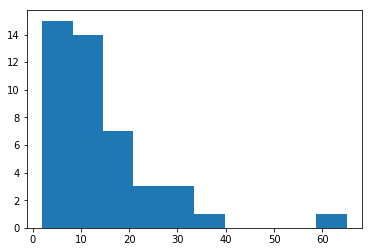

In [381]:
plt.hist(citations)
print(np.array(citations).sum())

In [326]:
paper

OrderedDict([('@refereed', 'true'),
             ('@article', 'true'),
             ('@type', 'ARTICLE'),
             ('bibcode', '2011ApJ...736L..35Y'),
             ('title', 'On the Origin of Intergranular Jets'),
             ('author',
              ['Yurchyshyn, V. B.',
               'Goode, P. R.',
               'Abramenko, V. I.',
               'Steiner, O.']),
             ('affiliation',
              'AA(Big Bear Solar Observatory, New Jersey Institute of Technology, Big Bear City, CA 92314, USA), AB(Big Bear Solar Observatory, New Jersey Institute of Technology, Big Bear City, CA 92314, USA), AC(Big Bear Solar Observatory, New Jersey Institute of Technology, Big Bear City, CA 92314, USA), AD(Kiepenheuer-Institut für Sonnenphysik, Schöneckstrasse 6, D-79104 Freiburg, Germany)'),
             ('journal',
              'The Astrophysical Journal Letters, Volume 736, Issue 2, article id. L35, 6 pp. (2011).'),
             ('volume', '736'),
             ('pubdate', 'Aug 201

In [374]:
gstsdo.values[3,:]

array(['Study of Two Successive Three-ribbon Solar Flares on 2012 July 6',
       'Wang, Haimin et al.', 28, 'Jan 2014',
       'The Astrophysical Journal Letters, Volume 781, Issue 1, article id. L23, 7 pp. (2014).',
       'This Letter reports two rarely observed three-ribbon flares (M1.9 and\nC9.2) on 2012 July 6 in NOAA AR 11515, which we found using Hα\nobservations of 0.\'\'1 resolution from the New Solar Telescope and Ca II\nH images from Hinode. The flaring site is characterized by an intriguing\n"fish-bone-like" morphology evidenced by both Hα images and a\nnonlinear force-free field (NLFFF) extrapolation, where two\nsemi-parallel rows of low-lying, sheared loops connect an elongated,\nparasitic negative field with the sandwiching positive fields. The NLFFF\nmodel also shows that the two rows of loops are asymmetric in height and\nhave opposite twists, and are enveloped by large-scale field lines\nincluding open fields. The two flares occurred in succession within half\nan hou

In [352]:
paper['url']

'http://adsabs.harvard.edu/abs/2011ApJ...736L..35Y'